In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spectral_analysis as sa
from math import floor
import importlib
import sys
module = sys.modules["spectral_analysis"]
importlib.reload(module)

<module 'spectral_analysis' from 'd:\\Users\\rewas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\spectral_analysis.py'>

Total power measured: 1328 μW
Power on horizontal polarization: 965 μW
Power on vertical polarization: 363 μW
Total power measured: 1328 μW
Power on horizontal polarization: 877 μW
Power on vertical polarization: 451 μW


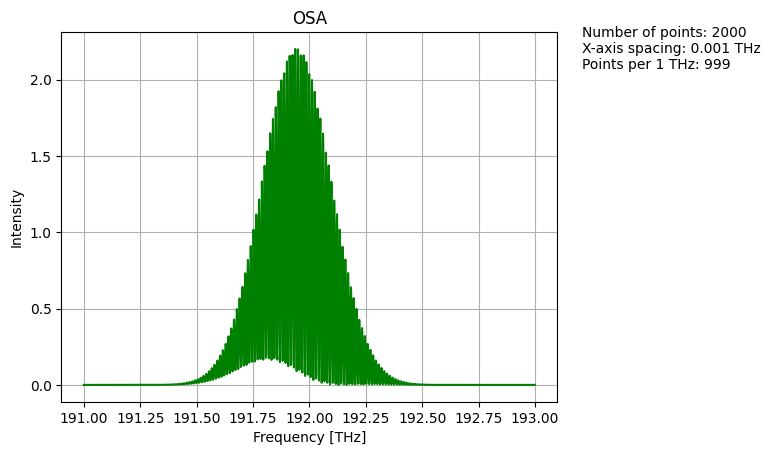

Total power measured: 1328 μW
Power on horizontal polarization: 965 μW
Power on vertical polarization: 363 μW
Total power measured: 1328 μW
Power on horizontal polarization: 877 μW
Power on vertical polarization: 451 μW


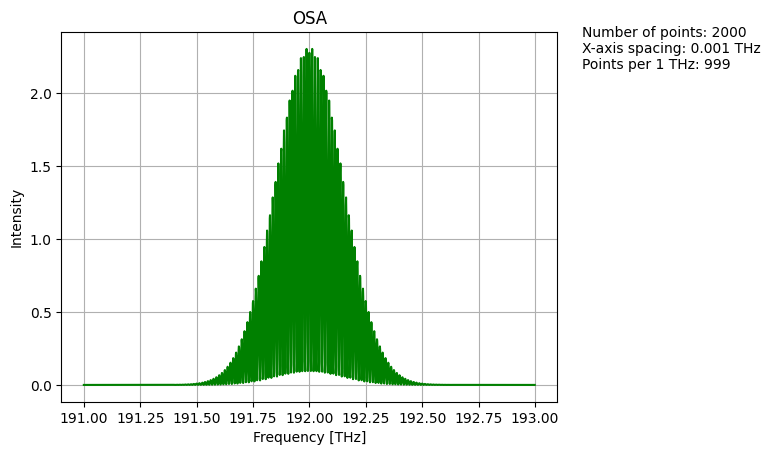

In [41]:
for t in range(2):
    pulse = sa.gaussian_pulse([191, 193], 192, 0.5)
    pulse0 = pulse.copy()
    pulse0.Y = np.zeros(len(pulse0))
    beam = sa.ray(pulse, pulse0)
    beam.rotate(np.pi/4*1.3)
    beam.powermeter()
    compl = np.vectorize(complex)
    beam.ver.Y = compl(beam.ver.Y)
    beam.hor.Y = compl(beam.hor.Y)
    beam.chirp("ver", 80)
    beam.chirp("hor", 80)
    beam.delay("ver", 80)
    if t == 0: beam.shear(-0.047*2, "ver")
    beam.rotate(np.pi/8)
    beam.powermeter()
    beam.polarizer("ver")
    if t == 0: p_spectrum = beam.OSA()
    else: t_spectrum = beam.OSA()

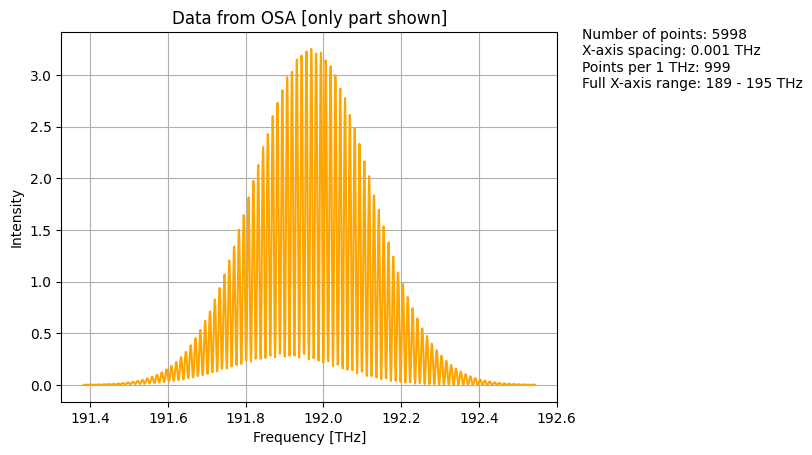

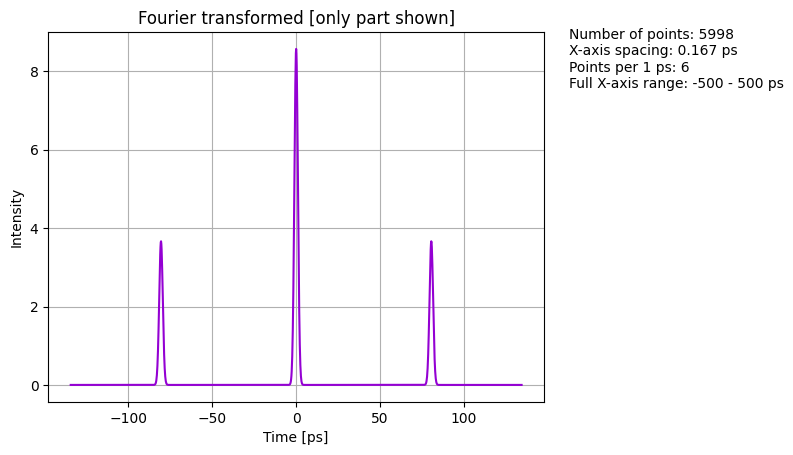

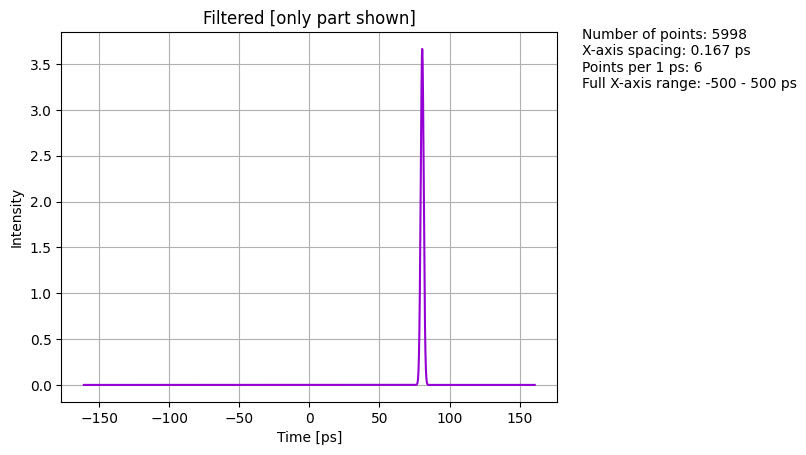

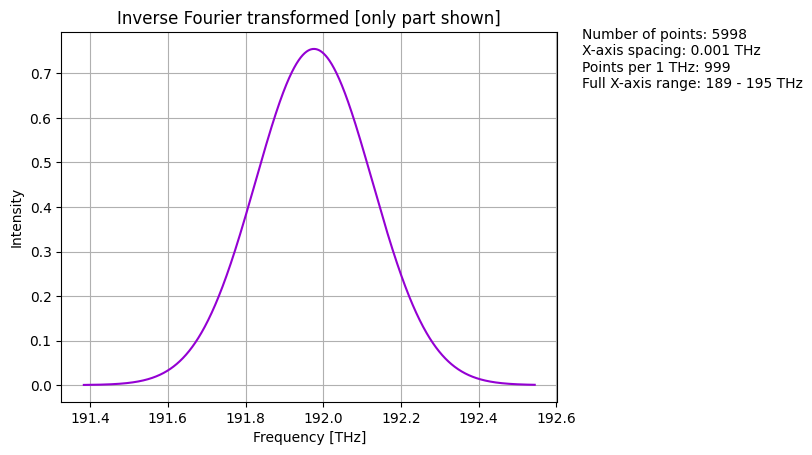

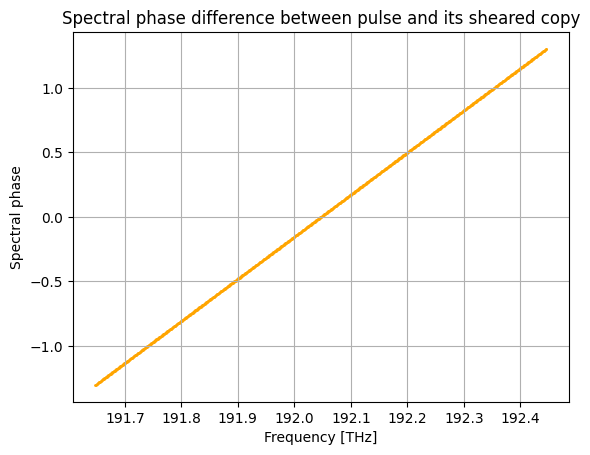

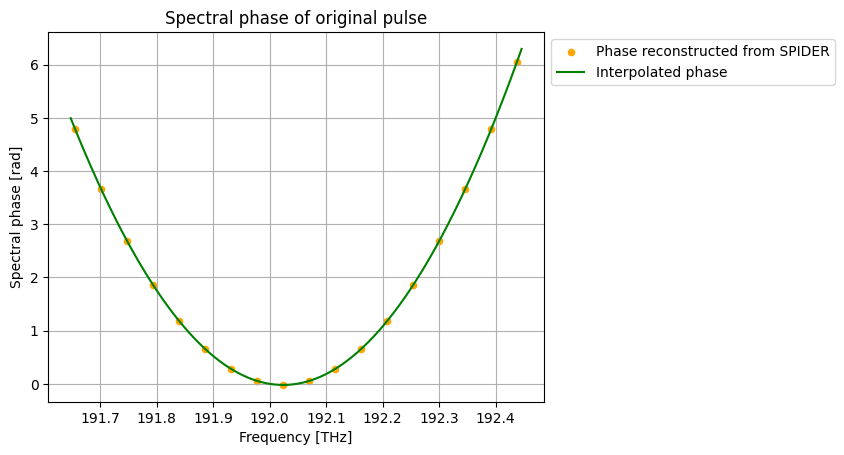

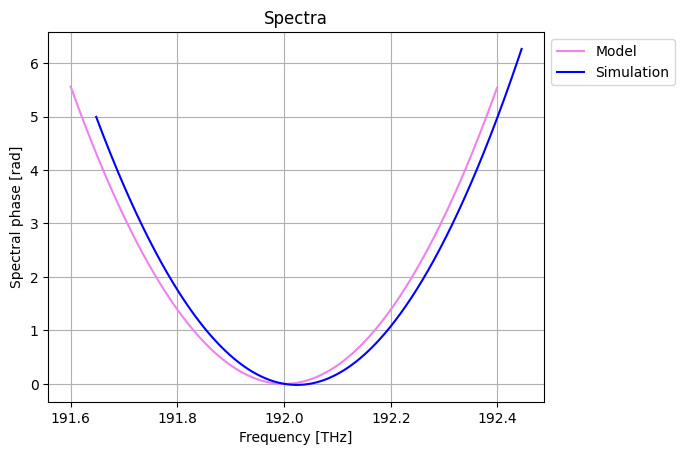

In [33]:
phase_sim = sa.spider(p_spectrum, t_spectrum, plot_steps = True, what_to_return = "phase", phase_borders = [191.6, 192.4])[1]

def phase(f, f_mean, fiber_length):
    c = 299792458 
    l_0 = c/(f_mean*1e3)
    D_l = 17
    omega = f*2*np.pi
    omega_mean = f_mean*2*np.pi
    return l_0**2*fiber_length*D_l/(4*np.pi*c)*(omega-omega_mean)**2

phase = np.vectorize(phase)

X = np.linspace(191.6, 192.4, 1000)
Y = phase(X, 192, 80)

phase_mod = sa.spectrum(X, Y, "freq", "phase")
sa.compare_plots([phase_mod, phase_sim], legend = ["Model", "Simulation"])